In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
#from api_keys import api_key

key = "d934602ac79ba381ee5e246d4677ae1900520da1"

In [24]:
#Load Field of Degree Data - 2017
#-------------------------------------------
url = "https://api.census.gov/data/2017/acs/acs1?get=group(B15012),NAME&for=state:*&key=" + key

response = response = requests.get(url).json()

population =[]
comp_math_stats = []
bio_agri_envir = []
engineer =[]
other_science =[]
business = []
education= []
name = []

for x in range(1,len(response)):
   
    name.append(response[x][0])
    population.append(float(response[x][2]))
    comp_math_stats.append(float(response[x][4]))
    engineer.append(float(response[x][14]))
    other_science.append(float(response[x][18]))
    business.append(float(response[x][20]))
    education.append(float(response[x][18]))

    
field_df = pd.DataFrame({"Name":name,
                       "Population":population,
                       "Comp_Math_Stat":comp_math_stats,
                       "Engineering":engineer,
                       "Other Science":other_science,
                       "Business":business,
                       "Education":education})

field_df["TotalComputer&Engineer"] = field_df["Comp_Math_Stat"] + field_df["Engineering"]

field_df["PercentComputer&Engineer"] = field_df["TotalComputer&Engineer"] / field_df["Population"]*100

#Load Education Level & Unemployment Data
#-----------------------------------------------

url = "https://api.census.gov/data/2017/acs/acs1/subject?get=NAME,S2301_C01_031E,S2301_C01_032E,S2301_C01_033E,S2301_C01_034E,S2301_C01_035E,S2301_C04_031E,S2301_C04_032E,S2301_C04_033E,S2301_C04_034E,S2301_C04_035E&for=state:*&key=" + key

response = response = requests.get(url).json()

name1 =[]
popul1 = []
lessHS =[]
HighSchool=[]
SomeColl=[]
BachorHigher=[]
unemp_popul1 = []
unemp_lessHS =[]
unemp_HighSchool=[]
unemp_SomeColl=[]
unemp_BachorHigher=[]

for x in range(1,len(response)):
   
    name1.append(response[x][0])
    popul1.append(float(response[x][1]))
    lessHS.append(float(response[x][2]))
    HighSchool.append(float(response[x][3]))
    SomeColl.append(float(response[x][4]))
    BachorHigher.append(float(response[x][5]))
    unemp_popul1.append(float(response[x][6]))
    unemp_lessHS.append(float(response[x][7]))
    unemp_HighSchool.append(float(response[x][8]))
    unemp_SomeColl.append(float(response[x][9]))
    unemp_BachorHigher.append(float(response[x][10]))
    

unemp_df = pd.DataFrame({"Name":name1,
                       "Population":popul1,
                       "LessHighSchool":lessHS,
                       "HighSchool":HighSchool,
                       "SomeCollege":SomeColl,
                       "BachelorsOrHigher":BachorHigher,
                       "Unemployment_Population":unemp_popul1,
                       "Unemployment_LessHS":unemp_lessHS, 
                       "Unemployment_HighSchool":unemp_HighSchool,
                        "Unemployment_SomeColl":unemp_SomeColl,
                        "Unemployment_BachelorHigher":unemp_BachorHigher})

unemp_df["PercentBachOrHigher"] = unemp_df["BachelorsOrHigher"] / unemp_df["Population"] *100 

all_data_2017_df = pd.merge(field_df, unemp_df , on='Name', how='outer')


#Load 2017 GDP Data
#-------------------
file_to_load = '2017StateGDP.csv'

gdp_data_df= pd.read_csv(file_to_load)

gdp_data_df.columns = ["GeoFIPS","Name","GDP2017"]

all_data_2017_df = pd.merge(all_data_2017_df, gdp_data_df , on='Name', how='outer')

all_data_2017_df = all_data_2017_df.dropna(axis=0, how="any")

output_data_file = "all_data_2017.csv"

#Create CSV File
all_data_2017_df.to_csv(output_data_file) 

all_data_2017_df


   

,Name,Population_x,Comp_Math_Stat,Engineering,Other Science,Business,Education,TotalComputer&Engineer,PercentComputer&Engineer,Population_y,...,SomeCollege,BachelorsOrHigher,Unemployment_Population,Unemployment_LessHS,Unemployment_HighSchool,Unemployment_SomeColl,Unemployment_BachelorHigher,PercentBachOrHigher,GeoFIPS,GDP2017
0,Alabama,903138.0,35298.0,67785.0,98075.0,199860.0,98075.0,103083.0,11.413870,2506391.0,...,787593.0,667228.0,4.8,12.5,5.9,4.5,2.1,26.621066,1000.0,211196.5
1,Alaska,150708.0,4613.0,10947.0,20277.0,19561.0,20277.0,15560.0,10.324601,398520.0,...,142661.0,113311.0,6.5,16.9,9.9,6.3,2.0,28.432952,2000.0,51479.0
2,Arizona,1478688.0,66801.0,120310.0,146689.0,318148.0,146689.0,187111.0,12.653853,3510512.0,...,1198014.0,1030067.0,4.7,7.1,6.6,4.8,2.5,29.342358,4000.0,326445.8
3,Arkansas,507048.0,23263.0,26006.0,53791.0,102490.0,53791.0,49269.0,9.716832,1511374.0,...,458668.0,368963.0,4.3,7.4,4.9,4.4,2.5,24.412422,5000.0,122703.5
4,California,9617244.0,545068.0,941497.0,774108.0,1706176.0,774108.0,1486565.0,15.457287,21174456.0,...,6161241.0,7251758.0,4.9,7.1,6.2,4.8,3.5,34.247671,6000.0,2797600.9
5,Colorado,1720238.0,84913.0,143203.0,144350.0,322939.0,144350.0,228116.0,13.260723,3048369.0,...,891392.0,1276902.0,3.5,4.6,4.8,3.9,2.5,41.888039,8000.0,345233.1
6,Connecticut,1042266.0,43317.0,77055.0,93004.0,200564.0,93004.0,120372.0,11.549067,1892760.0,...,479439.0,768531.0,5.1,10.3,7.7,5.5,2.8,40.603722,9000.0,264509.9
7,Delaware,223849.0,12786.0,18017.0,20562.0,49362.0,20562.0,30803.0,13.760615,500469.0,...,136733.0,161972.0,4.6,8.8,6.2,4.4,2.7,32.364043,10000.0,72461.3
8,District of Columbia,318206.0,12522.0,14485.0,13951.0,40267.0,13951.0,27007.0,8.487269,410622.0,...,63381.0,246858.0,6.0,12.1,13.9,9.0,3.4,60.118065,11000.0,135768.3
9,Florida,4747548.0,187170.0,366402.0,505356.0,1119765.0,505356.0,553572.0,11.660166,10804945.0,...,3366774.0,3251850.0,4.7,8.1,5.7,4.6,3.1,30.095942,12000.0,976385.5


In [25]:
#Determine Top Ten States with Computer and Engineering Degrees
all_data_2017_df = all_data_2017_df.sort_values("PercentComputer&Engineer", ascending=False).reset_index()

top10_data_2017_df=all_data_2017_df.head(10)

top10_data_2017_df

,index,Name,Population_x,Comp_Math_Stat,Engineering,Other Science,Business,Education,TotalComputer&Engineer,PercentComputer&Engineer,...,SomeCollege,BachelorsOrHigher,Unemployment_Population,Unemployment_LessHS,Unemployment_HighSchool,Unemployment_SomeColl,Unemployment_BachelorHigher,PercentBachOrHigher,GeoFIPS,GDP2017
0,47,Washington,1985814.0,122201.0,189263.0,175908.0,307810.0,175908.0,311464.0,15.684450,...,1347205.0,1447120.0,4.0,7.7,5.7,3.9,2.6,36.321388,53000.0,524322.7
1,4,California,9617244.0,545068.0,941497.0,774108.0,1706176.0,774108.0,1486565.0,15.457287,...,6161241.0,7251758.0,4.9,7.1,6.2,4.8,3.5,34.247671,6000.0,2797600.9
2,30,New Jersey,2660481.0,166539.0,224558.0,227409.0,568070.0,227409.0,391097.0,14.700237,...,1160004.0,2044040.0,4.5,8.2,5.9,4.9,3.0,42.424491,34000.0,602069.0
3,43,Texas,5736510.0,292336.0,539385.0,537662.0,1274939.0,537662.0,831721.0,14.498728,...,4343199.0,4435730.0,4.2,5.6,5.0,4.5,2.7,30.208214,48000.0,1645135.9
4,46,Virginia,2430185.0,154617.0,195883.0,190683.0,437375.0,190683.0,350500.0,14.422770,...,1242356.0,1825685.0,3.6,6.8,5.1,3.9,2.3,40.502221,51000.0,510586.1
5,22,Michigan,2148411.0,87642.0,220011.0,240829.0,427418.0,240829.0,307653.0,14.320025,...,1770926.0,1578866.0,4.8,12.5,6.5,4.8,2.3,30.632628,26000.0,508904.8
6,20,Maryland,1780447.0,117794.0,135755.0,159986.0,301323.0,159986.0,253549.0,14.240750,...,865790.0,1341339.0,4.2,8.6,6.5,4.4,2.4,41.082132,24000.0,399537.9
7,7,Delaware,223849.0,12786.0,18017.0,20562.0,49362.0,20562.0,30803.0,13.760615,...,136733.0,161972.0,4.6,8.8,6.2,4.4,2.7,32.364043,10000.0,72461.3
8,21,Massachusetts,2253156.0,116123.0,192540.0,187354.0,379267.0,187354.0,308663.0,13.699140,...,867689.0,1691938.0,3.8,7.6,5.4,3.8,2.6,45.967220,25000.0,542978.8
9,5,Colorado,1720238.0,84913.0,143203.0,144350.0,322939.0,144350.0,228116.0,13.260723,...,891392.0,1276902.0,3.5,4.6,4.8,3.9,2.5,41.888039,8000.0,345233.1


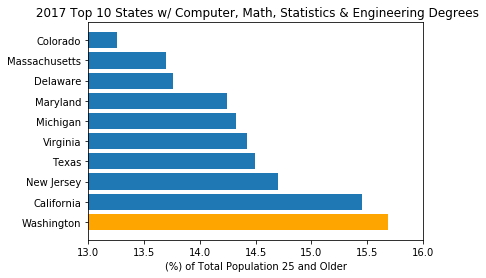

In [26]:
# 2017 Plot Ranking of States with highest number computer and engineering degrees



plt.barh(top10_data_2017_df["Name"], top10_data_2017_df["PercentComputer&Engineer"],align="center")
plt.barh(top10_data_2017_df["Name"][0], top10_data_2017_df["PercentComputer&Engineer"][0],align="center", color="orange")

plt.xlim(13,16)
ypos = top10_data_2017_df["Name"]

plt.xlabel("(%) of Total Population 25 and Older")

plt.title(" 2017 Top 10 States w/ Computer, Math, Statistics & Engineering Degrees")

plt.savefig("Top10StateComp&Engineer.png")

plt.show()

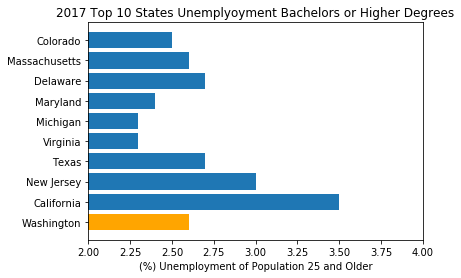

In [27]:
#Plot 2017 Unemployement for Population with Bachelors Degrees or Higher

plt.barh(top10_data_2017_df["Name"],top10_data_2017_df["Unemployment_BachelorHigher"],align="center")
plt.barh(top10_data_2017_df["Name"][0],top10_data_2017_df["Unemployment_BachelorHigher"][0],align="center", color="orange")

plt.xlim(2,4)
ypos = top10_data_2017_df["Name"]

plt.xlabel("(%) Unemployment of Population 25 and Older")

plt.title("2017 Top 10 States Unemplyoyment Bachelors or Higher Degrees")

plt.savefig("Top10StateUnemploymentr.png")

plt.show()

In [28]:
# 2017 Ranking of Top Ten States with Population with Professional Degrees

all_data_2017_df = all_data_2017_df.sort_values("PercentBachOrHigher", ascending=False)

top10edlevel_data_2017_df=all_data_2017_df.head(10)

top10edlevel_data_2017_df

,index,Name,Population_x,Comp_Math_Stat,Engineering,Other Science,Business,Education,TotalComputer&Engineer,PercentComputer&Engineer,...,SomeCollege,BachelorsOrHigher,Unemployment_Population,Unemployment_LessHS,Unemployment_HighSchool,Unemployment_SomeColl,Unemployment_BachelorHigher,PercentBachOrHigher,GeoFIPS,GDP2017
42,8,District of Columbia,318206.0,12522.0,14485.0,13951.0,40267.0,13951.0,27007.0,8.487269,...,63381.0,246858.0,6.0,12.1,13.9,9.0,3.4,60.118065,11000.0,135768.3
8,21,Massachusetts,2253156.0,116123.0,192540.0,187354.0,379267.0,187354.0,308663.0,13.699140,...,867689.0,1691938.0,3.8,7.6,5.4,3.8,2.6,45.967220,25000.0,542978.8
2,30,New Jersey,2660481.0,166539.0,224558.0,227409.0,568070.0,227409.0,391097.0,14.700237,...,1160004.0,2044040.0,4.5,8.2,5.9,4.9,3.0,42.424491,34000.0,602069.0
9,5,Colorado,1720238.0,84913.0,143203.0,144350.0,322939.0,144350.0,228116.0,13.260723,...,891392.0,1276902.0,3.5,4.6,4.8,3.9,2.5,41.888039,8000.0,345233.1
6,20,Maryland,1780447.0,117794.0,135755.0,159986.0,301323.0,159986.0,253549.0,14.240750,...,865790.0,1341339.0,4.2,8.6,6.5,4.4,2.4,41.082132,24000.0,399537.9
16,6,Connecticut,1042266.0,43317.0,77055.0,93004.0,200564.0,93004.0,120372.0,11.549067,...,479439.0,768531.0,5.1,10.3,7.7,5.5,2.8,40.603722,9000.0,264509.9
4,46,Virginia,2430185.0,154617.0,195883.0,190683.0,437375.0,190683.0,350500.0,14.422770,...,1242356.0,1825685.0,3.6,6.8,5.1,3.9,2.3,40.502221,51000.0,510586.1
38,45,Vermont,182557.0,5302.0,10936.0,14418.0,22346.0,14418.0,16238.0,8.894756,...,83481.0,124585.0,3.0,9.0,3.6,2.2,2.3,38.676940,50000.0,32545.2
11,29,New Hampshire,382070.0,19080.0,29384.0,34738.0,69003.0,34738.0,48464.0,12.684587,...,208832.0,277591.0,2.9,4.1,4.5,3.0,1.9,38.464342,33000.0,81649.7
30,32,New York,5383010.0,244788.0,295001.0,467130.0,982258.0,467130.0,539789.0,10.027643,...,2698071.0,4079238.0,4.6,8.4,5.8,4.8,2.9,38.266475,36000.0,1606601.3


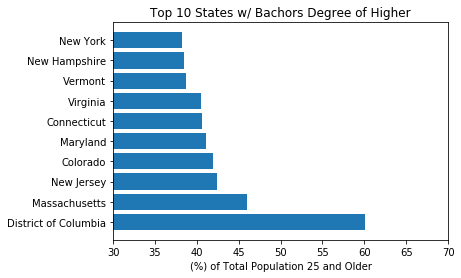

In [29]:
#Plot of Top Ten States with Population with Professional Degrees in all Fields of Study

plt.barh(top10edlevel_data_2017_df["Name"],top10edlevel_data_2017_df["PercentBachOrHigher"],align="center")

plt.xlim(30,70)
ypos = top10edlevel_data_2017_df["Name"]

plt.xlabel("(%) of Total Population 25 and Older")

plt.title("Top 10 States w/ Bachors Degree of Higher")

plt.savefig("Top10StatesDegrees.png")
plt.show()

In [30]:
#Load Field of Degree Data - 2010
#-------------------------------------------
url = "https://api.census.gov/data/2010/acs/acs1?get=group(B15012),NAME&for=state:*&key=" + key

response = response = requests.get(url).json()

population =[]
comp_math_stats = []
bio_agri_envir = []
engineer =[]
other_science =[]
business = []
education= []
name = []

for x in range(1,len(response)):
   
    name.append(response[x][0])
    population.append(float(response[x][2]))
    comp_math_stats.append(float(response[x][4]))
    engineer.append(float(response[x][14]))
    other_science.append(float(response[x][18]))
    business.append(float(response[x][20]))
    education.append(float(response[x][18]))

    
field_2010_df = pd.DataFrame({"Name":name,
                       "Population":population,
                       "Comp_Math_Stat":comp_math_stats,
                       "Engineering":engineer,
                       "Other Science":other_science,
                       "Business":business,
                       "Education":education})

field_2010_df["TotalComputer&Engineer"] = field_2010_df["Comp_Math_Stat"] + field_2010_df["Engineering"]
field_2010_df["PercentComputer&Engineer"] = field_2010_df["TotalComputer&Engineer"] / field_2010_df["Population"]*100

#Load Education Level & Unemployment Data
#-----------------------------------------------

url = "https://api.census.gov/data/2017/acs/acs1/subject?get=NAME,S2301_C01_031E,S2301_C01_032E,S2301_C01_033E,S2301_C01_034E,S2301_C01_035E,S2301_C04_031E,S2301_C04_032E,S2301_C04_033E,S2301_C04_034E,S2301_C04_035E&for=state:*&key=" + key

response = response = requests.get(url).json()

name1 =[]
popul1 = []
lessHS =[]
HighSchool=[]
SomeColl=[]
BachorHigher=[]
unemp_popul1 = []
unemp_lessHS =[]
unemp_HighSchool=[]
unemp_SomeColl=[]
unemp_BachorHigher=[]

for x in range(1,len(response)):
   
    name1.append(response[x][0])
    popul1.append(float(response[x][1]))
    lessHS.append(float(response[x][2]))
    HighSchool.append(float(response[x][3]))
    SomeColl.append(float(response[x][4]))
    BachorHigher.append(float(response[x][5]))
    unemp_popul1.append(float(response[x][6]))
    unemp_lessHS.append(float(response[x][7]))
    unemp_HighSchool.append(float(response[x][8]))
    unemp_SomeColl.append(float(response[x][9]))
    unemp_BachorHigher.append(float(response[x][10]))
    

unemp_2010_df = pd.DataFrame({"Name":name1,
                       "Population":popul1,
                       "LessHighSchool":lessHS,
                       "HighSchool":HighSchool,
                       "SomeCollege":SomeColl,
                       "BachelorsOrHigher":BachorHigher,
                       "Unemployment_Population":unemp_popul1,
                       "Unemployment_LessHS":unemp_lessHS, 
                       "Unemployment_HighSchool":unemp_HighSchool,
                         "Unemployment_SomeColl":unemp_SomeColl,
                         "Unemployment_BachelorHigher":unemp_BachorHigher})

unemp_2010_df["PercentBachOrHigher"] = unemp_2010_df["BachelorsOrHigher"] / unemp_2010_df["Population"] *100 

all_data_2010_df = pd.merge(field_2010_df, unemp_2010_df , on='Name', how='outer')

#Load 2017 GDP Data
#-------------------
file_to_load = '2010StateGDP.csv'

gdp_data_df= pd.read_csv(file_to_load)

gdp_data_df.columns = ["GeoFIPS","Name","GDP2010"]

all_data_2010_df = pd.merge(all_data_2010_df, gdp_data_df , on='Name', how='outer')

all_data_2010_df = all_data_2010_df.dropna(axis=0, how="any")

#Create CSV File
output_data_file = "all_data_2010.csv"
all_data_2010_df.to_csv(output_data_file) 

all_data_2010_df



,Name,Population_x,Comp_Math_Stat,Engineering,Other Science,Business,Education,TotalComputer&Engineer,PercentComputer&Engineer,Population_y,...,SomeCollege,BachelorsOrHigher,Unemployment_Population,Unemployment_LessHS,Unemployment_HighSchool,Unemployment_SomeColl,Unemployment_BachelorHigher,PercentBachOrHigher,GeoFIPS,GDP2010
0,Arkansas,403735.0,16358.0,19930.0,39732.0,82641.0,39732.0,36288.0,8.988074,1511374.0,...,458668.0,368963.0,4.3,7.4,4.9,4.4,2.5,24.412422,5000.0,101690.0
1,Alabama,751842.0,30605.0,61078.0,74651.0,167620.0,74651.0,91683.0,12.194450,2506391.0,...,787593.0,667228.0,4.8,12.5,5.9,4.5,2.1,26.621066,1000.0,174753.0
2,Alaska,138810.0,3928.0,11719.0,14260.0,19182.0,14260.0,15647.0,11.272243,398520.0,...,142661.0,113311.0,6.5,16.9,9.9,6.3,2.0,28.432952,2000.0,52882.5
3,Arizona,1153768.0,49447.0,89971.0,106403.0,243402.0,106403.0,139418.0,12.083712,3510512.0,...,1198014.0,1030067.0,4.7,7.1,6.6,4.8,2.5,29.342358,4000.0,248210.0
4,California,7773345.0,370561.0,742726.0,602622.0,1389308.0,602622.0,1113287.0,14.321852,21174456.0,...,6161241.0,7251758.0,4.9,7.1,6.2,4.8,3.5,34.247671,6000.0,1974614.5
5,Colorado,1330194.0,63148.0,106096.0,109261.0,252701.0,109261.0,169244.0,12.723257,3048369.0,...,891392.0,1276902.0,3.5,4.6,4.8,3.9,2.5,41.888039,8000.0,255140.5
6,Connecticut,930837.0,36295.0,68193.0,75139.0,179943.0,75139.0,104488.0,11.225166,1892760.0,...,479439.0,768531.0,5.1,10.3,7.7,5.5,2.8,40.603722,9000.0,237653.4
7,Delaware,180019.0,6730.0,13096.0,15938.0,35902.0,15938.0,19826.0,11.013282,500469.0,...,136733.0,161972.0,4.6,8.8,6.2,4.4,2.7,32.364043,10000.0,57447.4
8,District of Columbia,235900.0,9415.0,8864.0,7617.0,25275.0,7617.0,18279.0,7.748622,410622.0,...,63381.0,246858.0,6.0,12.1,13.9,9.0,3.4,60.118065,11000.0,106120.3
9,Florida,3603456.0,122024.0,292018.0,343604.0,841709.0,343604.0,414042.0,11.490136,10804945.0,...,3366774.0,3251850.0,4.7,8.1,5.7,4.6,3.1,30.095942,12000.0,737791.1


In [31]:
# 2010 Determine Top Ten States with Computer and Engineering Degrees

all_data_2010_df = all_data_2010_df.sort_values("PercentComputer&Engineer", ascending=False).reset_index()

top10_data_2010_df=all_data_2010_df.head(10)

top10_data_2010_df

,index,Name,Population_x,Comp_Math_Stat,Engineering,Other Science,Business,Education,TotalComputer&Engineer,PercentComputer&Engineer,...,SomeCollege,BachelorsOrHigher,Unemployment_Population,Unemployment_LessHS,Unemployment_HighSchool,Unemployment_SomeColl,Unemployment_BachelorHigher,PercentBachOrHigher,GeoFIPS,GDP2010
0,46,Virginia,1998058.0,118540.0,173403.0,143625.0,354737.0,143625.0,291943.0,14.611338,...,1242356.0,1825685.0,3.6,6.8,5.1,3.9,2.3,40.502221,51000.0,422902.0
1,20,Maryland,1518219.0,93152.0,126955.0,126939.0,248414.0,126939.0,220107.0,14.497711,...,865790.0,1341339.0,4.2,8.6,6.5,4.4,2.4,41.082132,24000.0,316451.5
2,4,California,7773345.0,370561.0,742726.0,602622.0,1389308.0,602622.0,1113287.0,14.321852,...,6161241.0,7251758.0,4.9,7.1,6.2,4.8,3.5,34.247671,6000.0,1974614.5
3,29,New Hampshire,321618.0,17114.0,27158.0,24814.0,61574.0,24814.0,44272.0,13.765399,...,208832.0,277591.0,2.9,4.1,4.5,3.0,1.9,38.464342,33000.0,64151.6
4,47,Washington,1534380.0,78847.0,131865.0,132977.0,238423.0,132977.0,210712.0,13.732713,...,1347205.0,1447120.0,4.0,7.7,5.7,3.9,2.6,36.321388,53000.0,365551.9
5,30,New Jersey,2263361.0,123222.0,186868.0,175867.0,479502.0,175867.0,310090.0,13.700422,...,1160004.0,2044040.0,4.5,8.2,5.9,4.9,3.0,42.424491,34000.0,495149.0
6,43,Texas,4403125.0,203748.0,381830.0,366149.0,984088.0,366149.0,585578.0,13.299145,...,4343199.0,4435730.0,4.2,5.6,5.0,4.5,2.7,30.208214,48000.0,1237196.8
7,22,Michigan,1803762.0,66433.0,171934.0,182577.0,370069.0,182577.0,238367.0,13.214992,...,1770926.0,1578866.0,4.8,12.5,6.5,4.8,2.3,30.632628,26000.0,386625.9
8,21,Massachusetts,1886223.0,87998.0,154975.0,146915.0,332465.0,146915.0,242973.0,12.881457,...,867689.0,1691938.0,3.8,7.6,5.4,3.8,2.6,45.967220,25000.0,409762.5
9,5,Colorado,1330194.0,63148.0,106096.0,109261.0,252701.0,109261.0,169244.0,12.723257,...,891392.0,1276902.0,3.5,4.6,4.8,3.9,2.5,41.888039,8000.0,255140.5


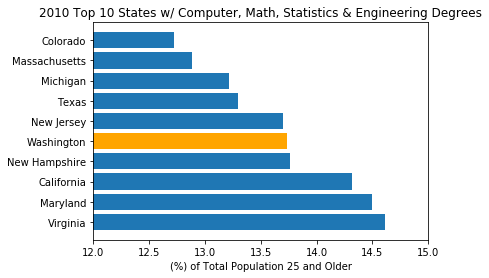

In [32]:
# 2010 Ranking of States with Highest Population of Computer & Engineering Degrees

plt.barh(top10_data_2010_df["Name"],top10_data_2010_df["PercentComputer&Engineer"],align="center")
plt.barh(top10_data_2010_df["Name"][4],top10_data_2010_df["PercentComputer&Engineer"][4],align="center", color="orange")

plt.xlim(12,15)
ypos = top10_data_2010_df["Name"]

plt.xlabel("(%) of Total Population 25 and Older")

plt.title("2010 Top 10 States w/ Computer, Math, Statistics & Engineering Degrees")

plt.savefig("2010Top10StateComp&Engineer.png")
plt.show()

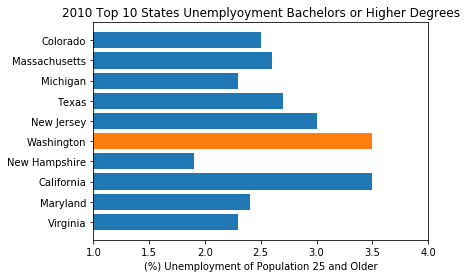

In [33]:
#Plot 2017 Unemployement for Population with Bachelors Degrees or Higher

ypos = top10_data_2010_df["Name"]

plt.barh(top10_data_2010_df["Name"],top10_data_2010_df["Unemployment_BachelorHigher"],align="center")
plt.barh(top10_data_2010_df["Name"][4],top10_data_2010_df["Unemployment_BachelorHigher"],align="center")

plt.xlim(1,4)
ypos = top10_data_2010_df["Name"]

plt.xlabel("(%) Unemployment of Population 25 and Older")
plt.title("2010 Top 10 States Unemplyoyment Bachelors or Higher Degrees")

plt.savefig("2010Top10StateUnemploymentr.png")

plt.show()